<a href="https://colab.research.google.com/github/MaulanaJauhar/PCVK/blob/main/Week5/Meet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modul 5 - Operasi Atirmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking
##Kelompok 8



*   Aido Luthfi Al Hakim **(6 | 2141720136)**
Link Github : https://github.com/luthf-ai/PCVK-Polinema-Jobsheet/tree/main/week05
*   Jauhar Maulana A'la  **(14 | 2141720186)**
Link Github : https://github.com/MaulanaJauhar/PCVK/blob/main/Week5
*   Naufal Falah Wafiuddin **(23 | 2141720129)**
Link Github : https://github.com/NFalah25/PCVK/tree/main/Week%205



#**Tugas Praktikum**

####1. Buat Gamma Correction sesuai dengan petunjuk berikut
Nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut kode untuk meminta nilai masukan dati pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang diberikan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from math import log10, sqrt
import glob

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


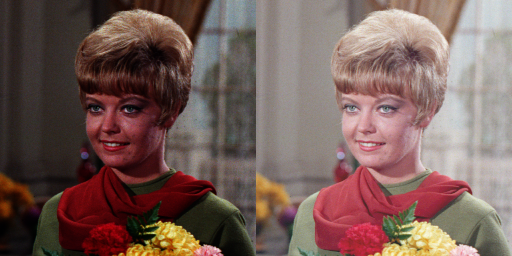

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv.LUT(src, table)


img = cv.imread('/content/drive/MyDrive/Image/female.tiff')
gammaImg = gammaCorrection(img, gamma)

final_frame = cv.hconcat((img, gammaImg))
cv2_imshow(final_frame)

####2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27

= 128, dst.

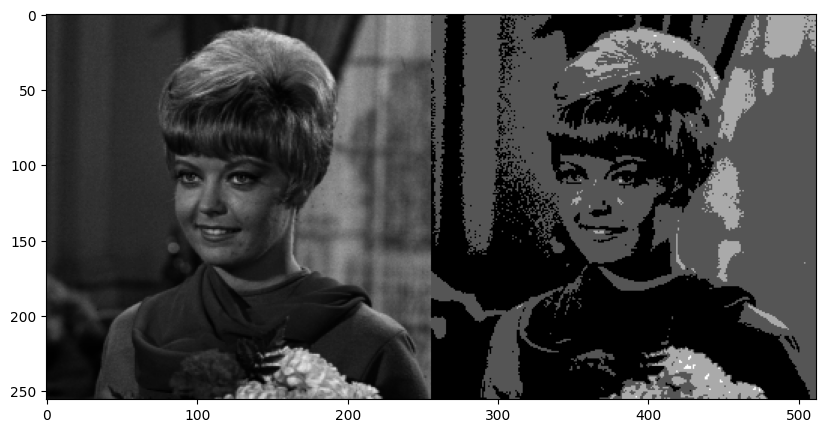

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/Image/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

plt.figure(figsize=(10, 5))

combined_image = np.concatenate((original, depth_image), axis=1)

# plt.subplot(1, 2, 1)
# plt.imshow(original, cmap='gray')
# plt.title('Original Image')

# plt.subplot(1, 2, 2)
plt.imshow(combined_image, cmap='gray')
# plt.title('Depth Image')

plt.show()

####3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

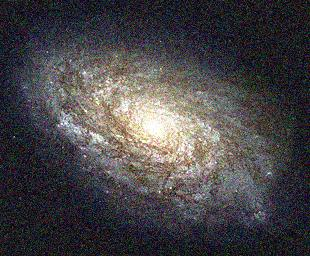

In [ ]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Image/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [ ]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)


PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.358303527625132


Nilai PSNR adalah 27.528234121489415 (dB)


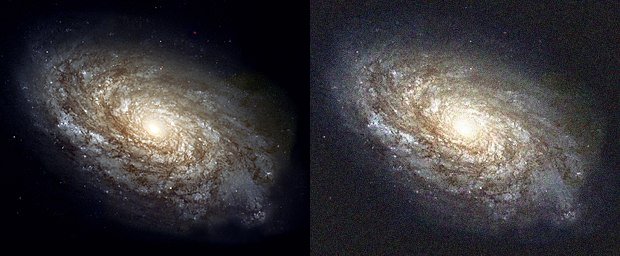

In [ ]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Image/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Image/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)


def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.536353302870612 (dB)


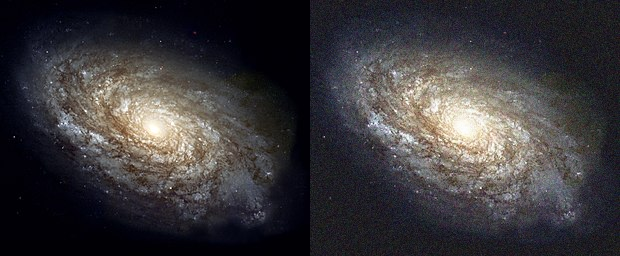

In [ ]:
#Jumlah Citra di Average 5
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.518847643577423 (dB)


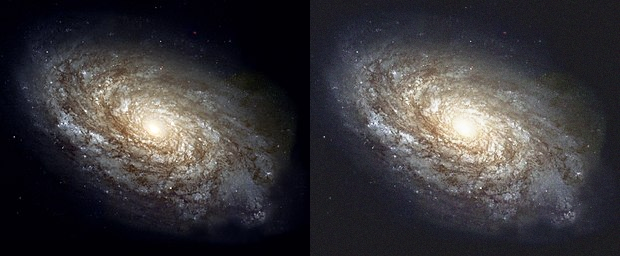

In [ ]:
#Jumlah Citra di Average 30
dst = cv_img[0]
noise_number = 30
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.49265263813214 (dB)


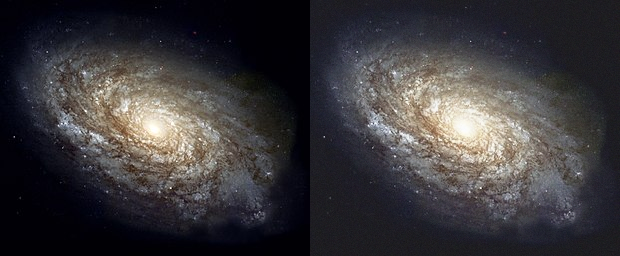

In [ ]:
#Jumlah Citra di Average 60
dst = cv_img[0]
noise_number = 60
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.511402420759946 (dB)


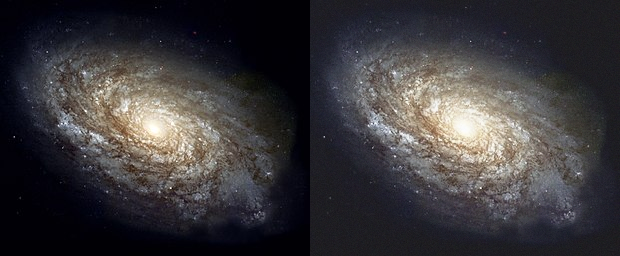

In [ ]:
#Jumlah Citra di Average 80
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.51849386067974 (dB)


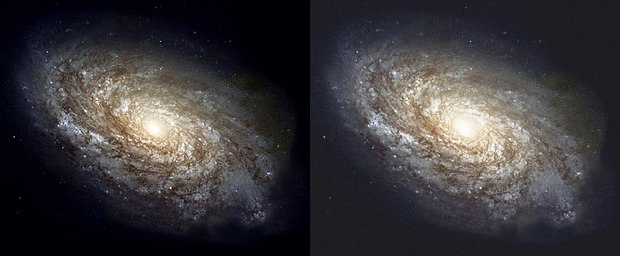

In [ ]:
#Jumlah Citra di Average 100
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

####4. Buat image masking untuk image berikut. Image kiri adalah image asli (image ktp) sedangkan image paling kanan adalah hasilnya

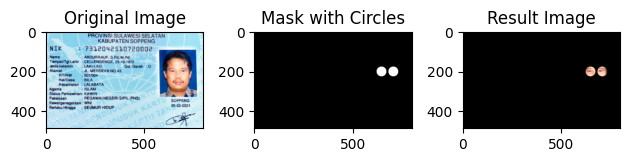

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Image/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = cv.bitwise_and(img, mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()


####5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

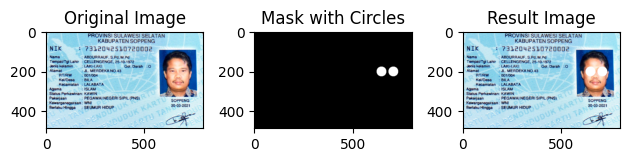

In [ ]:
# OR

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Image/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)
result = img | mask

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

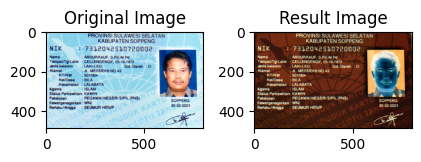

In [ ]:
# NOT

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Image/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)
result = ~img

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# plt.subplot(132)
# plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
# plt.title('Mask with Circles')

plt.subplot(132)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()


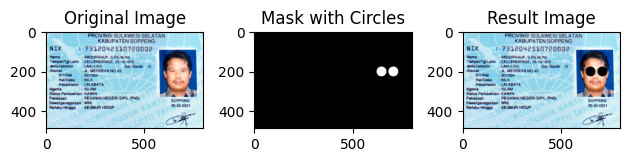

In [ ]:
from numpy.ma.core import bitwise_and
# NAND

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Image/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = bitwise_and(img, ~mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

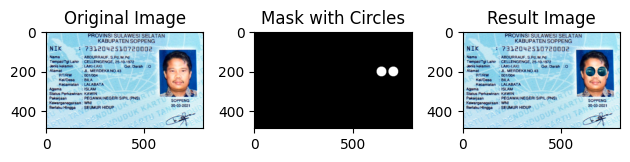

In [ ]:
# XOR

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/Image/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (645, 200)
radius1 = 25
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (705, 200)
radius2 = 25
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = cv.bitwise_xor(img, mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()